In [1]:
import torch
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))
from miniGP.gp import GaussianProcess
from miniGP.kernel import RBFKernel

In [2]:
def black_box(X):
    return torch.sin(X)

In [3]:
def noisy_black_box(X):
    return black_box(X) + (1e-2)*torch.randn()

In [4]:
bounds = torch.tensor([[0,5]])
kernel = RBFKernel(0.5)
model = GaussianProcess(kernel)

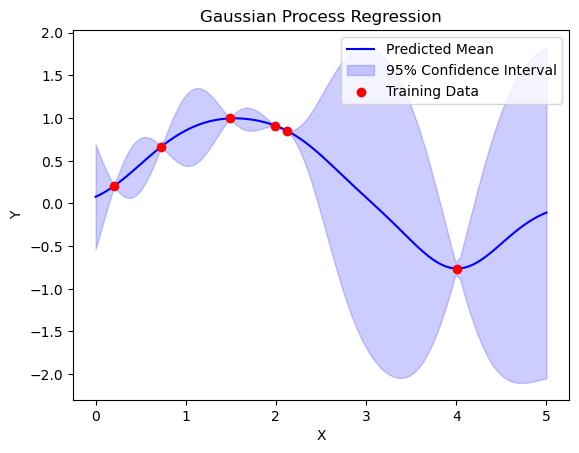

In [5]:
X_train = torch.rand((6, bounds.shape[0])) * (bounds[:, 1] - bounds[:, 0]) + bounds[:, 0]
y_train = black_box(X_train)
model.fit(X_train, y_train)
X_test = torch.linspace(0, 5, 100).unsqueeze(1)
model.plot(X_test)